# Area-Under-Curve Measurement

Objectives:
* Compute true positive, true negative, false positive, and false negative classification rate
* Adjust classification threshold to control above rates
* Plot AUC  to demonstrate accuracy
* Calculate AUC as a single value

### Background

You want to be familiar with ROC and AUC.

#### Receiver Operating Characteristic Curve (ROC)

[wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) [sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### Area Under Curve (AUC)

[sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

The ROC curve provides a visualization of the performance of a classifier, with false-positive rates along the $x$ axis and true-positive rates along the $y$ axis. A perfect classifier produces no false positives (100% specificity) and no false negatives (100% sensitivity). In reality, classifiers are not so discerning.

### Do:

Correct the bugs in the following code blocks in order to work through the mechanics of building an AUC. 

Once you've calculated `FPR` and `TPR` for the Logistic Regression classifier on its Sprint Challenge dataset and visualized the results, modify it to compute the same data using the _test_ data, instead of the _train_ data.

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1')
# Use train_test_split to create a training set
train_x, test_x, train_y, test_y = train_test_split(data[['x1','x2']],data['y'])

# Create and train(fit) the model
regr = LogisticRegression()
regr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the train set

In [13]:
# Predict y_hat for the test set created previously

y_hat = regr.predict(train_x)
print(y_hat)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1.]


### Observe precision

In [14]:
# True positive: if the prediction is 1, and the original data is 1, their sum is 2
true_positives = (y_hat+train_y)==2
# False positive: if the prediction is 1, but the original data is 0, their sum is 1
false_positives = (y_hat+train_y)==1
print(true_positives.T)
print(false_positives.T)

16    False
6     False
22     True
19    False
21     True
8     False
38     True
39     True
33     True
11    False
31     True
20     True
37     True
18    False
25     True
34     True
7     False
12    False
14    False
13    False
24     True
36     True
0     False
35     True
32     True
10    False
15    False
5     False
4     False
26     True
Name: y, dtype: bool
16    False
6     False
22    False
19    False
21    False
8     False
38    False
39    False
33    False
11    False
31    False
20    False
37    False
18     True
25    False
34    False
7     False
12    False
14    False
13    False
24    False
36    False
0     False
35    False
32    False
10    False
15    False
5     False
4     False
26    False
Name: y, dtype: bool


In [15]:
# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(train_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(train_x)
print(dec)

[[0.94569669 0.05430331]
 [0.83074498 0.16925502]
 [0.05886417 0.94113583]
 [0.51485386 0.48514614]
 [0.07690938 0.92309062]
 [0.80782679 0.19217321]
 [0.01744823 0.98255177]
 [0.35783056 0.64216944]
 [0.22559398 0.77440602]
 [0.65143499 0.34856501]
 [0.26253666 0.73746334]
 [0.01319793 0.98680207]
 [0.00638096 0.99361904]
 [0.29242457 0.70757543]
 [0.00522789 0.99477211]
 [0.08047281 0.91952719]
 [0.90257484 0.09742516]
 [0.789324   0.210676  ]
 [0.79300857 0.20699143]
 [0.94371902 0.05628098]
 [0.20296641 0.79703359]
 [0.32870694 0.67129306]
 [0.8947321  0.1052679 ]
 [0.05360997 0.94639003]
 [0.01345659 0.98654341]
 [0.98288949 0.01711051]
 [0.82814176 0.17185824]
 [0.97450913 0.02549087]
 [0.77420754 0.22579246]
 [0.01084965 0.98915035]]
[-2.85733671 -1.5909163   2.77185492 -0.05943293  2.48509962 -1.43595058
  4.03091483  0.5847926   1.23335945 -0.62535284  1.03282563  4.31440954
  5.04803576  0.88363748  5.24850507  2.4359403  -2.22616712 -1.32085545
 -1.34315662 -2.81947182  1.36

### 2.1 Build ROC curves

In [16]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

    0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0     1    0    0    0    0    0    0    0    0    0    0
1     1    1    0    0    0    0    0    0    0    0    0
2     1    1    1    1    1    1    1    1    1    1    0
3     1    1    1    1    1    0    0    0    0    0    0
4     1    1    1    1    1    1    1    1    1    1    0
5     1    1    0    0    0    0    0    0    0    0    0
6     1    1    1    1    1    1    1    1    1    1    0
7     1    1    1    1    1    1    1    0    0    0    0
8     1    1    1    1    1    1    1    1    0    0    0
9     1    1    1    1    0    0    0    0    0    0    0
10    1    1    1    1    1    1    1    1    0    0    0
11    1    1    1    1    1    1    1    1    1    1    0
12    1    1    1    1    1    1    1    1    1    1    0
13    1    1    1    1    1    1    1    1    0    0    0
14    1    1    1    1    1    1    1    1    1    1    0
15    1    1    1    1    1    1    1    1    1    1    0
16    1    0  

### 3. Calculate TP and FP at each discrimination level

False positive rate at threshold 0.1:  0.6666666666666666
True positive rate at threshold 0.1:  1.0
            0
0.0  1.000000
0.1  0.666667
0.2  0.400000
0.3  0.200000
0.4  0.133333
0.5  0.066667
0.6  0.066667
0.7  0.066667
0.8  0.000000
0.9  0.000000
1.0  0.000000
            0
0.0  1.000000
0.1  1.000000
0.2  1.000000
0.3  1.000000
0.4  1.000000
0.5  1.000000
0.6  1.000000
0.7  0.866667
0.8  0.666667
0.9  0.666667
1.0  0.000000


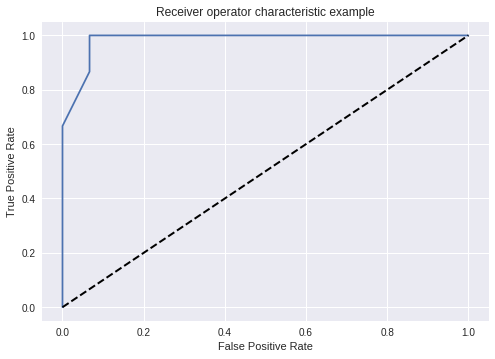

In [17]:
# Base case:
false_positives = np.sum(predictions['0.1']-train_y.values==1)
true_positives = np.sum(predictions['0.1']+train_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(train_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(train_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-train_y.values==1)/np.sum(train_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+train_y.values==2)/np.sum(train_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operator characteristic example');
    

### 4. Example using sklearn

In [0]:
from sklearn import metrics

0.9844444444444445
0.9911111111111112
[0.         0.         0.06666667 0.06666667 1.        ]
[0.06666667 0.86666667 0.86666667 1.         1.        ]


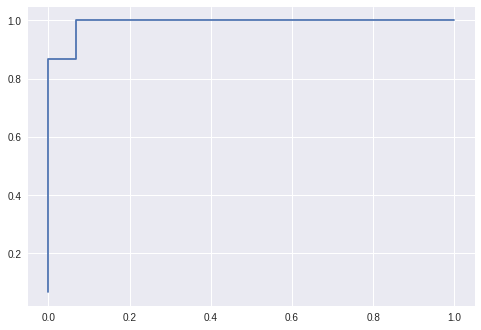

In [19]:
# The Area-Under-The-Curve Score
print(metrics.auc(fp.T,tp.T))
print(metrics.roc_auc_score(train_y.values,proba[::,1:2:]))

# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(train_y.values,proba[::,1:2:])
print(fpr)
print(tpr)
plt.plot(fpr,tpr);

## Do

### 5. Compute the ROC and AUC using the _testset_ instead of the _trainset_


AUC: 0.92


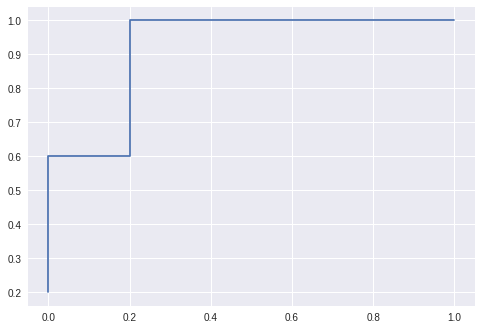

In [21]:
# Compute and plot
proba = regr.predict_proba(test_x)

fpr, tpr, _ = metrics.roc_curve(test_y.values,proba[::,1:2:])

print('AUC:', metrics.auc(fpr.T,tpr.T))

plt.plot(fpr,tpr);
    